## Fig 1 - EMG LEARNING

FIGURES 1C, D, E

* FIGURE 1C: example target and cursor trajectory

* FIGURE 1D: error between early (first 30s post-ramp) and late (last 30s)

* FIGURE 1E: users learn within trial and aross blocks

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import wilcoxon as wilcoxon

# meta analysis functions
import sys
sys.path.append('/Users/mmadduri/Documents/GitHub/meta-analysis/util/')
import analysis
import plotting
import util_continuous as utils
# seaborn.set()

In [2]:
# path = '/Volumes/My Passport/cphs/'
PATH = '/Users/mmadduri/OneDrive - UW/PhD_Research/Data/continuous-full/'

with open(PATH + 'continuous_full_data_block1_sorted.pickle', 'rb') as handle:
    refs_block1, poss_block1, dec_vels_block1, int_vel_block1, emgs_block1, Ws_block1, Hs_block1, alphas_block1, pDs_block1, times_block1, conditions_block1 = pickle.load(handle)
keys = ['METACPHS_S106', 'METACPHS_S107','METACPHS_S108', 'METACPHS_S109', 'METACPHS_S110', 'METACPHS_S111', 'METACPHS_S112', 'METACPHS_S113', 'METACPHS_S114', 'METACPHS_S115', 'METACPHS_S116', 'METACPHS_S117', 'METACPHS_S118', 'METACPHS_S119']


# using the task error that calculates time domain in cm
# data from: /visualizations/fig-setup/20240124-figure-data-setup.ipynb
PATH = '/Users/mmadduri/OneDrive - UW/PhD_Research/Data/pickle-data-from-python/'
with open(PATH + 'time-domain-error/time-domain-error-30sec-in-cm.pkl','rb') as handle:
    td_error, td_error_first, td_error_last, t0_start, t0_end, t1_end, td_diff, td_diff_slow, td_diff_fast, td_diff_pos, td_diff_neg, td_diff_pD3, td_diff_pD4 = pickle.load(handle)


In [3]:
key = keys[0]
alphas = alphas_block1[key]
print(alphas)
conds = conditions_block1[key]
print(conds)
pDs = pDs_block1[key]
print(pDs)
n_keys = len(keys)
print(n_keys)

[0.25 0.25 0.25 0.25 0.75 0.75 0.75 0.75]
['D_1' 'D_2' 'D_5' 'D_6' 'D_3' 'D_4' 'D_7' 'D_8']
[0.001  0.0001 0.001  0.0001 0.001  0.0001 0.001  0.0001]
14


In [4]:
# trying to figure out how often decoder updates -- every 1202 samples

W = Ws_block1[keys[0]][0]
W[1:,:,:].shape # 7199 time points x (decoder dimensions is 2 x 6)
dold = W[0]
update_ix = []
for ix,d in enumerate(W[1:]):
  if (np.array_equal(dold,d)==False):
    update_ix.append(ix)
    dold = d

update_ix.append(len(W) - 1) 
update_ix = np.asarray(update_ix)
update_ix = np.hstack([[0],update_ix])
print("update index in time indices")
print(update_ix)

# only go up to 20432

update_times = times_block1[keys[0]][0][update_ix]
print("")
print("update times in seconds")
print(update_times)

update_mins = update_times/60
print("")
print("update times in minutes")
print(update_mins)

tscale = update_ix[-1]/update_times[-1]
print("")
print("time scale conversion (index --> seconds): ", tscale)

update index in time indices
[    0  1200  2402  3604  4806  6008  7210  8412  9614 10816 12018 13220
 14422 15624 16826 18028 19230 20432 20769]

update times in seconds
[  0.          16.81372571  33.70942521  50.44435     67.45188546
  84.74962473 101.82288647 118.90209508 136.32002926 153.7001555
 170.77472734 188.02292895 205.35715556 222.46085095 239.64881945
 256.75217056 274.14669037 291.41761136 296.34003878]

update times in minutes
[0.         0.28022876 0.56182375 0.84073917 1.12419809 1.41249375
 1.69704811 1.98170158 2.27200049 2.56166926 2.84624546 3.13371548
 3.42261926 3.70768085 3.99414699 4.27920284 4.56911151 4.85696019
 4.93900065]

time scale conversion (index --> seconds):  70.08502828627614


In [5]:
xmax = max(refs_block1['METACPHS_S106'][0][:, 0])
ymax = max(refs_block1['METACPHS_S106'][0][:, 1])
xscale = 50/xmax
yscale = 50/ymax


assert(xmax*xscale == 50)

METACPHS_S106
D_7


Text(0.52, 0.75, '...')

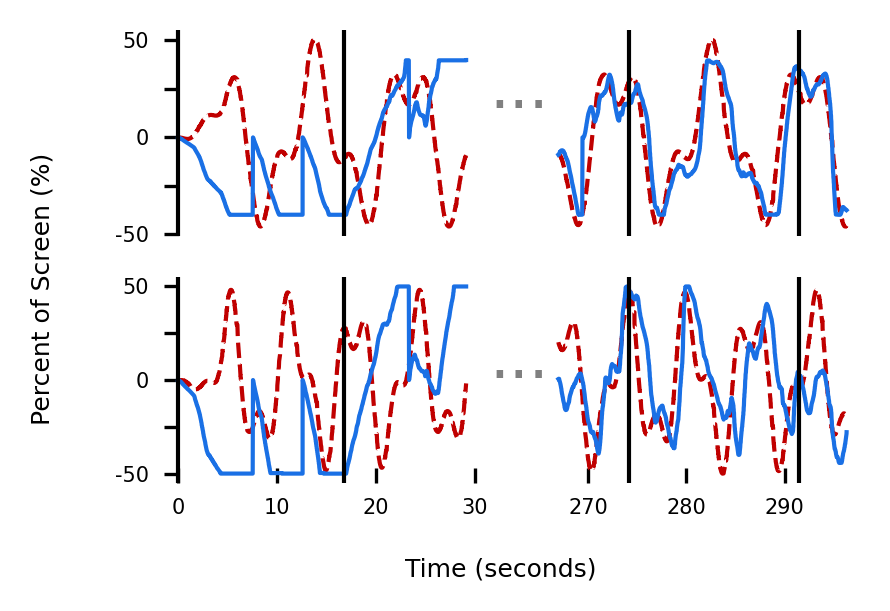

In [6]:
# choosing some random subject/condition that's done reasonably well (a.k.a. "representative subject")
k = keys[0]
c = 6


min_time = utils.min_time
colors = utils.colors

print(k)
print(conds[c])

# first 30 s
# min_time = total number of samples in the trial
s0 = 0
s1 = int(min_time/10)

# last 30 s
s2 = int(9/10*min_time)
s3 = min_time

# set up figures
fig1, axs1 = plt.subplots(2, 2, figsize=(3, 2)) #, layout = 'constrained')


# figure 1, axs1[0, 0] - x, first minute
ref_x = refs_block1[k][c][s0:s1, 0]
pos_x = poss_block1[k][c][s0:s1, 0]
time_x = times_block1[k][c][s0:s1] # this is in seconds
plotting.plot_time_domain_ref_curs(time_x, ref_x*xscale, pos_x*xscale, 
                                   utils.colors['target'], utils.colors['cursor'], fig = fig1, 
                                   ax = axs1[0, 0], r_lw = 1, c_lw = 1)

# figure 1, axs1[0, 1] - x, last minute
ref_x = refs_block1[k][c][s2:s3, 0]
pos_x = poss_block1[k][c][s2:s3, 0]
time_x = times_block1[k][c][s2:s3]
plotting.plot_time_domain_ref_curs(time_x, ref_x*xscale, pos_x*xscale,  
                                   utils.colors['target'], utils.colors['cursor'],fig = fig1, 
                                   ax = axs1[0, 1],r_lw = 1, c_lw = 1)


# figure 1, axs1[1, 0] - y, first minute
ref_y = refs_block1[k][c][s0:s1, 1]
pos_y = poss_block1[k][c][s0:s1, 1]
time_y = times_block1[k][c][s0:s1]
plotting.plot_time_domain_ref_curs(time_y, ref_y*yscale, pos_y*yscale,  
                                   utils.colors['target'], utils.colors['cursor'],fig = fig1, 
                                   ax = axs1[1, 0], r_lw = 1, c_lw = 1)

# figure 1, axs1[1] - y, last minute
ref_y = refs_block1[k][c][s2:s3, 1]
pos_y = poss_block1[k][c][s2:s3, 1]
time_y = times_block1[k][c][s2:s3] # in seconds
plotting.plot_time_domain_ref_curs(time_y, ref_y*yscale, pos_y*yscale, 
                                    utils.colors['target'], utils.colors['cursor'],fig = fig1, 
                                    ax = axs1[1, 1], r_lw = 1, c_lw = 1)


# frame, ticks
# x - first minute
axs1[0, 0].set_yticks([-50, -25, 0, 25, 50], ['-50', '','0', '', '50'], fontsize=5)
axs1[0, 0].set_xticks([])

# x - last minute
axs1[0, 1].set_xticks([])

# y - first minute
axs1[1, 0].set_yticks([-50, -25, 0, 25, 50], ['-50', '','0', '', '50'], fontsize=5)
axs1[1, 0].tick_params(axis='x', labelsize=5)

# y - last minute
axs1[1, 1].tick_params(axis='x', labelsize=5)

# set layout
# fig1.tight_layout()

# # titles and labels
axs1[0, 1].xaxis.label.set_size(5)

# set vlines for decoder adaptations
for upd in update_times[0:2]:
    axs1[0, 0].axvline(x=upd, color='black', linewidth=1)
    axs1[1, 0].axvline(x=upd, color='black', linewidth=1)

for upd in update_times[-3:-1]:
    axs1[0, 1].axvline(x=upd, color='black', linewidth=1)
    axs1[1, 1].axvline(x=upd, color='black', linewidth=1)

fig1.text(-0.01, 0.23, 'Percent of Screen (%)', ha='center', rotation='vertical', fontsize=6)
fig1.text(0.5, -0.03, 'Time (seconds)', ha='center', fontsize=6)
fig1.text(0.52, 0.3, '...', ha= 'center', fontsize=15, color = 'gray')
fig1.text(0.52, 0.75, '...', ha= 'center', fontsize=15, color = 'gray')



In [7]:
# image_format = 'pdf' # e.g .png, .svg, etc.
# image_name = 'fig1-td-error-example.pdf'
# PATH = '/Users/mmadduri/OneDrive - UW/PhD_Research/Figures/myo-coadapt-2023/nov2023/fig1/python-figs/'
# fig1.savefig(PATH + image_name, format=image_format, dpi=300)

In [8]:
# calculate the early vs late error - this is subjx x trals
td_first = np.mean(td_error[:, :, :, t0_start:t0_end], axis = -1)
td_end = np.mean(td_error[:, :, :, -t1_end:], axis = -1)

# find td_first and td_last per subject and 
td_first_subj = np.mean(td_first, axis = (0, 2))
td_last_subj = np.mean(td_end, axis = (0, 2))


WilcoxonResult(statistic=22734.0, pvalue=8.460758711193716e-26)


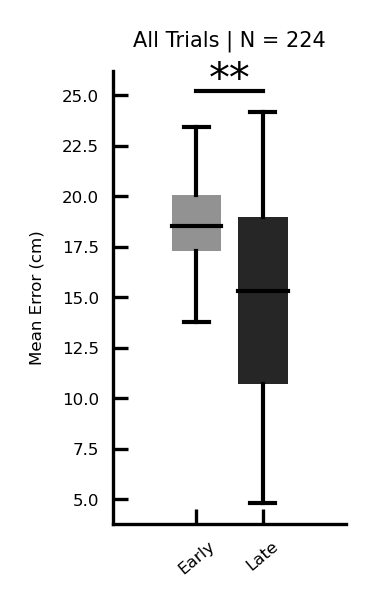

In [9]:
## all trials

fig, axs = plt.subplots(1, 1, figsize=(1, 2))
## WILCOXON
tck_size = 4 # for label sizeing



data1 = np.ndarray.flatten(td_first)
data2 = np.ndarray.flatten(td_end)
data_groups = [data1, data2]
data_labels = ['Early', 'Late']
data_pos = [0, 0.4]
bplot = axs.boxplot(data_groups, 
                    showfliers=False,
                    patch_artist=True,
                    positions=data_pos,
                    widths = 0.3,
                    boxprops=dict(edgecolor="none"),
                    medianprops=dict(color='black', lw=1))


t = 0
if colors is not None:
    for patch, color in zip(bplot['boxes'], [colors['late'], colors['late']]):
        patch.set_facecolor(color)
        t = t + 1
        if t == 1:
            patch.set_alpha(0.5)

# rotate labels  
axs.set_xticks(data_pos,data_labels, rotation=40)

w = wilcoxon(data1, data2, alternative='greater') 
print(w)


# set labels and axes
plotting.remove_and_set_axes(axs, tick_size =tck_size, bottom=True, left=True)
axs.tick_params(axis='x', labelsize=tck_size)
axs.set_ylabel('Mean Error (cm)', fontsize=tck_size);
axs.set_title("All Trials | N = "  + str(len(data1)))


plotting.plot_significance(pvalue = w.pvalue, data1=data1, data2 = data2, 
                           data_pos = data_pos, fig=fig, ax=axs, fontsize=10, lw=1)

WilcoxonResult(statistic=104.0, pvalue=0.0001220703125)


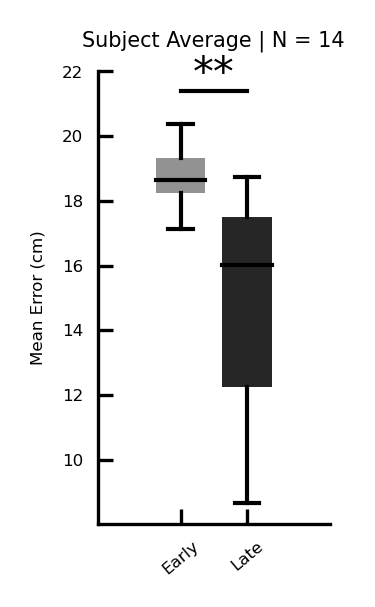

In [10]:
fig, axs = plt.subplots(1, 1, figsize=(1, 2))
## WILCOXON
tck_size = 4 # for label sizeing

# make sure that the Wilcoxon comparisons here are N of 14
assert(td_first_subj.size== len(keys)) # make sure the data is the number of subjects
assert(td_last_subj.size == len(keys)) # make sure the data is the number of subjects


data1 = np.ndarray.flatten(td_first_subj)
data2 = np.ndarray.flatten(td_last_subj)
data_groups = [data1, data2]
data_labels = ['Early', 'Late']
data_pos = [0, 0.4]
bplot = axs.boxplot(data_groups, 
                    showfliers=False,
                    patch_artist=True,
                    positions=data_pos,
                    widths = 0.3,
                    boxprops=dict(edgecolor="none"),
                    medianprops=dict(color='black', lw=1))


t = 0
if colors is not None:
    for patch, color in zip(bplot['boxes'], [colors['late'], colors['late']]):
        patch.set_facecolor(color)
        t = t + 1
        if t == 1:
            patch.set_alpha(0.5)

# rotate labels  
axs.set_xticks(data_pos,data_labels, rotation=40)

w = wilcoxon(data1, data2, alternative='greater') 
print(w)

# set labels and axes
plotting.remove_and_set_axes(axs, tick_size =tck_size, bottom=True, left=True)
axs.tick_params(axis='x', labelsize=tck_size)
axs.set_ylabel('Mean Error (cm)', fontsize=tck_size);
axs.set_title("Subject Average | N = " + str(len(data1)))


plotting.plot_significance(pvalue = w.pvalue, data1=data1, data2 = data2, 
                           data_pos = data_pos, fig=fig, ax=axs, fontsize=10, lw=1)

Fig 1E - Decoder initialization

WilcoxonResult(statistic=45.0, pvalue=0.6697998046875)
WilcoxonResult(statistic=39.0, pvalue=0.42626953125)


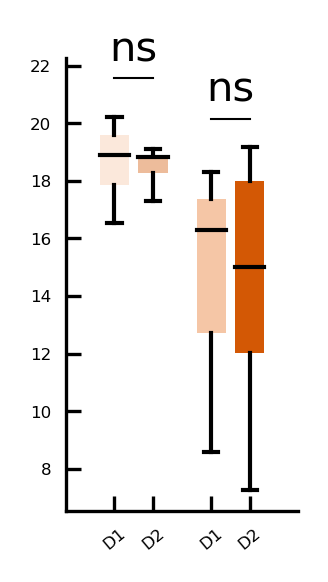

In [11]:
## 1E - no difference in performance between initial and end

fig, axs = plt.subplots(1, 1, figsize=(1, 2))
## WILCOXON
# early = first 30 seconds after ramp
td_error_first_med_pos = np.mean(td_error_first[:, :, utils.pos_init], axis = (0, 2))
td_error_last_med_pos =  np.mean(td_error_last[:, :, utils.pos_init], axis = (0, 2))

# late = last 30 seconds of trial
td_error_first_med_neg =  np.mean(td_error_first[:, :, utils.neg_init], axis = (0, 2))
td_error_last_med_neg = np.mean(td_error_last[:, :, utils.neg_init], axis = (0, 2))

# make sure that the Wilcoxon comparisons here are N of 14
assert(td_error_first_med_pos.shape == (utils.n_keys, )) # make sure the data is the number of subjects
assert(td_error_last_med_pos.shape == (utils.n_keys, )) # make sure the data is the number of subjects
assert(td_error_first_med_neg.shape == (utils.n_keys, )) # make sure the data is the number of subjects
assert(td_error_last_med_neg.shape == (utils.n_keys, )) # make sure the data is the number of subjects



data1 = np.ndarray.flatten(td_error_first_med_pos)
data2 = np.ndarray.flatten(td_error_first_med_neg)

data3 = np.ndarray.flatten(td_error_last_med_pos)
data4 = np.ndarray.flatten(td_error_last_med_neg)

data_groups = [data1, data2, data3, data4]
data_labels = ['D1', 'D2', 'D1', 'D2']
data_pos = [0, 0.4, 1, 1.4]
bplot = axs.boxplot(data_groups, 
                    showfliers=False,
                    patch_artist=True,
                    positions=data_pos,
                    widths = 0.3,
                    boxprops=dict(edgecolor="none"),
                     medianprops=dict(color='k', lw=1))


t = 0
if utils.colors is not None:
    for patch, color in zip(bplot['boxes'], [utils.colors['pos_init'], utils.colors['neg_init'], 
                                             utils.colors['pos_init'], utils.colors['neg_init']]):
        patch.set_facecolor(color)
        if t < 2:
            patch.set_alpha(0.4)
        t = t + 1

# rotate labels  
axs.set_xticks(data_pos,data_labels, rotation=40)

w1 = wilcoxon(data1, data2) 
print(w1)
plotting.plot_significance(pvalue = w1.pvalue, data1=data1, data2 = data2, data_pos = data_pos[:2], 
                           ax=axs, lw=0.5, fontsize = 10, y_bar = 1, y_asterix = 2)

w2 = wilcoxon(data3, data4) 
print(w2)

plotting.plot_significance(pvalue = w2.pvalue, data1=data3, data2 = data4, data_pos = data_pos[-2:], 
                           ax=axs, lw=0.5, fontsize = 10, y_bar = 1, y_asterix = 2)

plotting.remove_and_set_axes(axs, tick_size =tck_size, bottom=True, left=True)
